### Import relevant libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load in dataset and get an overview of what the data looks like

In [74]:
loans = pd.read_csv('loan_data.csv')

In [75]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [76]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [77]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Lets take a visual walkthrough of some of the relationships in the code

### We start off by examining specifically the FICO scores and how they relate to Credity Policy in the first graph and whether or not they ended up paying the loan (Not Fully Paid) in the second graph

Text(0.5, 0, 'FICO')

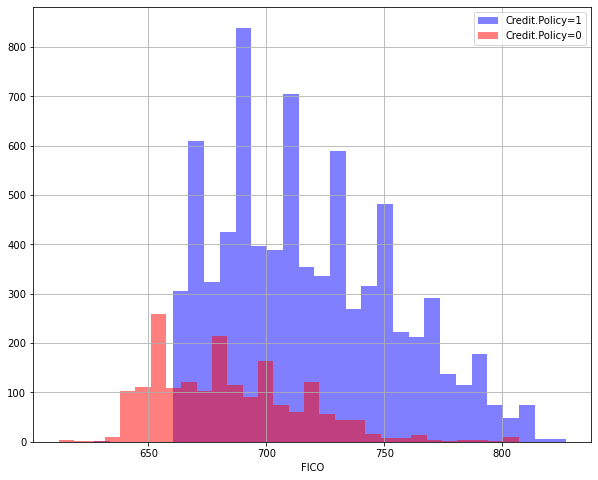

In [78]:
plt.figure(figsize=(10,8))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

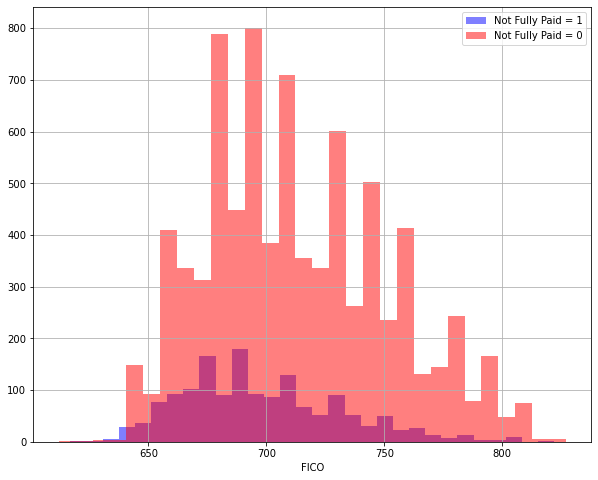

In [79]:
plt.figure(figsize=(10,8))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30,color='blue',label='Not Fully Paid = 1',alpha=0.5)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,color='red',label='Not Fully Paid = 0',alpha=0.5)
plt.legend()
plt.xlabel('FICO')

### Using seaborn we can use a countplot to show for each type of loan given (i.e. for what purpose) and how many people did or did not pay back that loan

### Note: The blue bars denote that the loan was fully paid off while the orange bars denote that the loan was not fully paid off

<AxesSubplot:xlabel='purpose', ylabel='count'>

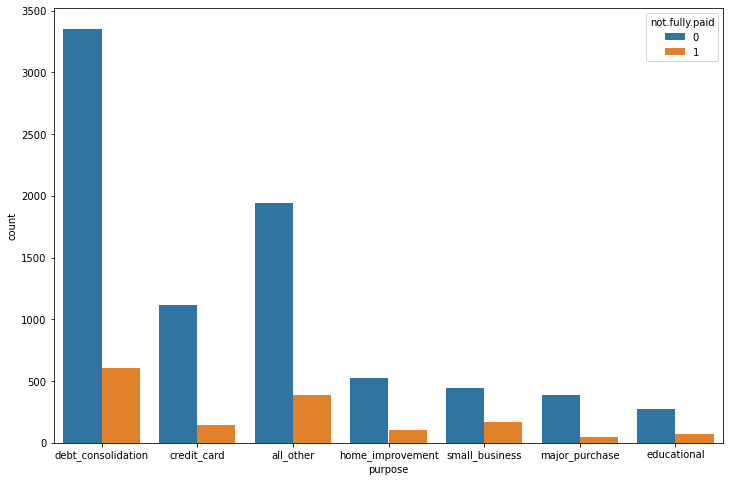

In [80]:
plt.figure(figsize=(12,8))
sns.countplot(data=loans,x='purpose',hue='not.fully.paid')

### There are still more interesting insights to see from the FICO score and how it relates to interest rates for a given loan

<Figure size 1008x576 with 0 Axes>

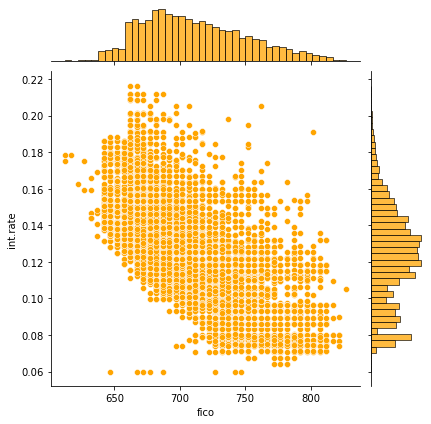

In [81]:
plt.figure(figsize=(14,8))
sns.jointplot(data=loans,x='fico',y='int.rate',color='orange')

### Now we can put all the pieces together and see if there is a trend between not paying off the loan and an individuals credit policy. We use seaborns lmplot to get a regression line

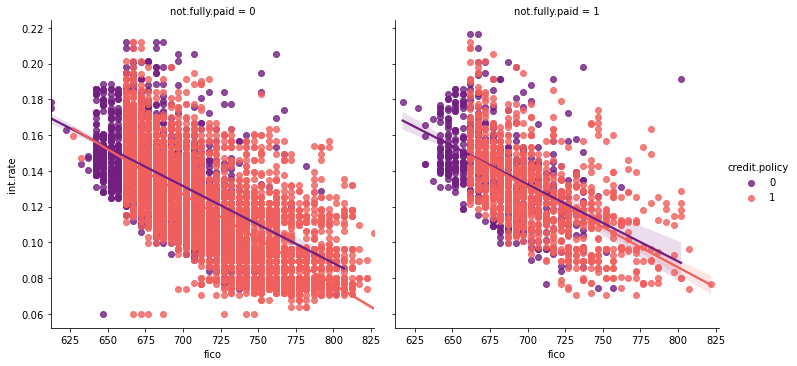

In [82]:
sns.lmplot(data=loans,x='fico',y='int.rate',col='not.fully.paid',hue='credit.policy',legend=True,palette='magma')

### Now that we have a better understanding of the data as a whole, it is deal with categorical variables such as the purpose feature

In [83]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [84]:
cat_feats = ['purpose']

In [85]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

### Split the data up for testing and training using sklearn train_test_split import.  We are using not fully paid as our label as this is ultimately what we are trying to predict

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### There are many viable means of creating a classifier, in this project I will be using both a DecisionTreeClassifier and  Random Forest

### I am going to first go through the DecisionTree route

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtc = DecisionTreeClassifier()

In [91]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Once the model is fit we will use to predict on test data and evaluate performance

In [92]:
predictions = dtc.predict(X_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2411
           1       0.22      0.24      0.23       463

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.74      0.74      2874



### The model overall wasnt very good we will see if the Random Forest performs better

### The method of instanstiating and training the RandomForestClassifier is very similar to that of the DecisionTree except we have to specify the number of estimators

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc = RandomForestClassifier(n_estimators=100)

In [97]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Again, we predict on test data and evaluate performance

In [98]:
rfc_pred = rfc.predict(X_test)

In [99]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2411
           1       0.41      0.02      0.04       463

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



In [100]:
print(confusion_matrix(y_test,rfc_pred))

[[2398   13]
 [ 454    9]]


### Lets see if using different amounts of estimators can yield a better performance

In [101]:
rfc75 = RandomForestClassifier(n_estimators=75)
rfc50 = RandomForestClassifier(n_estimators=50)
rfc25 = RandomForestClassifier(n_estimators=25)

In [102]:
rfc75.fit(X_train,y_train)
rfc50.fit(X_train,y_train)
rfc25.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
rfc_pred75 = rfc75.predict(X_test)
rfc_pred50 = rfc50.predict(X_test)
rfc_pred25 = rfc25.predict(X_test)

In [106]:
print("75 Estimators Report")
print(classification_report(y_test,rfc_pred75))
print("\n")

print("50 Estimators Report")
print(classification_report(y_test,rfc_pred50))
print("\n")

print("25 Estimators Report")
print(classification_report(y_test,rfc_pred25))

75 Estimators Report
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2411
           1       0.46      0.03      0.05       463

    accuracy                           0.84      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874



50 Estimators Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2411
           1       0.48      0.02      0.05       463

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874



25 Estimators Report
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2411
           1       0.40      0.04      0.07       463

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.49      2874
weighte

### It seems of these three 50 estimators performed the best, but only very marginally so